In [36]:
# 作业一：美国50个州七种犯罪率的主成分分析(exec7.6.xlsx)
"""
数据集：
x1:杀人罪
x2:强奸罪
x3:抢劫罪
x4:伤害罪
x5:夜盗罪
x6:盗窃罪
x7:汽车犯罪

流程：
1.绘制散点图并观察
2.按方差累计贡献度提取主成分（碎石图）
3.主成分含义解释
4.求正交变换矩阵（系数矩阵）
5.由主成分计算样本得分，并排序
"""

'\n数据集：\nx1:杀人罪\nx2:强奸罪\nx3:抢劫罪\nx4:伤害罪\nx5:夜盗罪\nx6:盗窃罪\nx7:汽车犯罪\n\n流程：\n1.绘制散点图并观察\n2.按方差累计贡献度提取主成分（碎石图）\n3.主成分含义解释\n4.求正交变换矩阵（系数矩阵）\n5.由主成分计算样本得分，并排序\n'

In [37]:
# 导入函数包和数据集
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

df = pd.read_excel("exec7.6.xlsx")

<Figure size 1000x1000 with 0 Axes>

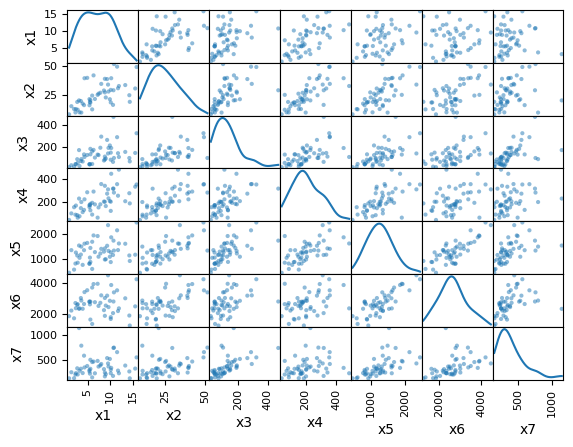

[[1.         0.60122047 0.48370757 0.64855048 0.38581683 0.10191983
  0.06881448]
 [0.60122047 1.         0.59187935 0.7402595  0.71213007 0.61398818
  0.34890153]
 [0.48370757 0.59187935 1.         0.55707825 0.63724196 0.44673993
  0.59067951]
 [0.64855048 0.7402595  0.55707825 1.         0.62290853 0.40436333
  0.27584265]
 [0.38581683 0.71213007 0.63724196 0.62290853 1.         0.79212104
  0.55795326]
 [0.10191983 0.61398818 0.44673993 0.40436333 0.79212104 1.
  0.44417992]
 [0.06881448 0.34890153 0.59067951 0.27584265 0.55795326 0.44417992
  1.        ]]


'\n以相关系数大于0.7为标准，可以看到x2（强奸罪）和x4(抢劫罪)、x5(夜盗罪)相关程度高，x5(夜盗罪)和x6(盗窃罪)相关程度高，主成分分析后，相关程度高的变量或特征更容易被某一两个主成分替代。\n'

In [38]:
# 散点图矩阵和相关系数矩阵
data = df[["x1","x2","x3","x4","x5","x6","x7"]] # 数据标准化

fig=plt.figure(figsize=[10,10])
pd.plotting.scatter_matrix(data, diagonal="density") # 散点图矩阵
plt.show()

Cov_Matrix = np.corrcoef(data.T) # 相关系数矩阵
print(Cov_Matrix)
"""
以相关系数大于0.7为标准，可以看到x2（强奸罪）和x4(抢劫罪)、x5(夜盗罪)相关程度高，x5(夜盗罪)和x6(盗窃罪)相关程度高，主成分分析后，相关程度高的变量或特征更容易被某一两个主成分替代。
"""

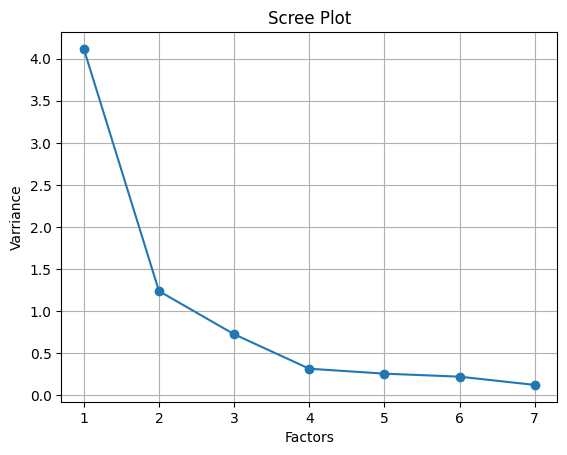

[0.58785136 0.76481162 0.86849971 0.91370429 0.95055778 0.98227771
 1.        ]
[ 0.30027916  0.62917444  0.1782453  -0.26759277  0.23211411 -0.53812286
 -0.25911677] 
 [ 0.43175936  0.16943512 -0.24419758  0.29648548 -0.06221567 -0.18847069
  0.77327066] 
 [ 0.39687549 -0.04224698  0.49586087  0.00390268  0.55798926  0.51997683
  0.11438481]


'\n[ 0.30027916  0.62917444  0.1782453  -0.26759277 -0.23211411  0.53812286 -0.25911677]\n第一主成分关于原变量的线性系数：可以看到变量x2, x6绝对值较大，即第一主成分与强奸罪，盗窃罪关系大。\n[ 0.43175936  0.16943512 -0.24419758  0.29648548  0.06221567  0.18847069 0.77327066]\n第二主成分关于原变量的线性系数：可以看到变量x7, x1绝对值较大，即第二主成分与汽车犯罪，杀人罪关系大。\n[ 0.39687549 -0.04224698  0.49586087  0.00390268 -0.55798926 -0.51997683 0.11438481]\n第三主成分关于原变量的线性系数：可以看到变量x5, x6, x3绝对值较大，即第三主成分与夜盗罪，盗窃罪，抢劫罪关系大。\n'

In [39]:
# 确定主成分
"""
sklearn模块中关于主成分分析的方法很少，因而后续我们将根据主成分的原始定义来对其提取。

定义Transform函数，输入数据集data，输出谱分解成分方差向量、谱分解正交变换矩阵
"""
def Transform(data):
    data = scale(data) 
    Cov_Matrix = np.corrcoef(data.T)
    feater_Value, feater_Vec =  np.linalg.eig(Cov_Matrix)
    Order = np.argsort(feater_Value)[::-1]
    Var = np.sort(feater_Value)[::-1]; 
    Vec = []
    for i in range(len(Var)):
        Vec.append(feater_Vec[Order[i]])
    return(Var, Vec)

# 碎石图
Var = Transform(data)[0] # 变换后各成分方差
X = np.array([1,2,3,4,5,6,7])
plt.plot(X,Var, marker="o")
plt.title("Scree Plot")  
plt.xlabel("Factors")
plt.ylabel("Varriance")
plt.grid()
plt.show()

# 累计方差贡献率
Accu = np.array([])
Sum = np.sum(Var); sum = 0
for i in range(len(Var)):
    sum = sum+Var[i]
    Accu = np.append(Accu, sum/Sum)
print(Accu)
"""
谱分解后，各成分方差由大到小为：
4.11495951、 1.23872183、 0.72581663、 0.31643205、 0.25797446、0.22203947、0.12405606
累计方差贡献率为：
0.58785136、0.76481162、0.86849971、0.91370429、0.95055778、0.98227771、1.0
结合碎石图可知，保存前三个成分为主成分最合适。
"""

# 主成分含义解释
Vec = Transform(data)[1]
print(Vec[0],"\n",Vec[1],"\n",Vec[2])
"""
[ 0.30027916  0.62917444  0.1782453  -0.26759277 -0.23211411  0.53812286 -0.25911677]
第一主成分关于原变量的线性系数：可以看到变量x2, x6绝对值较大，即第一主成分与强奸罪，盗窃罪关系大。
[ 0.43175936  0.16943512 -0.24419758  0.29648548  0.06221567  0.18847069 0.77327066]
第二主成分关于原变量的线性系数：可以看到变量x7, x1绝对值较大，即第二主成分与汽车犯罪，杀人罪关系大。
[ 0.39687549 -0.04224698  0.49586087  0.00390268 -0.55798926 -0.51997683 0.11438481]
第三主成分关于原变量的线性系数：可以看到变量x5, x6, x3绝对值较大，即第三主成分与夜盗罪，盗窃罪，抢劫罪关系大。
"""

Mississippi Nevada Tennessee
Massachusetts Alaska California
Nevada New York California


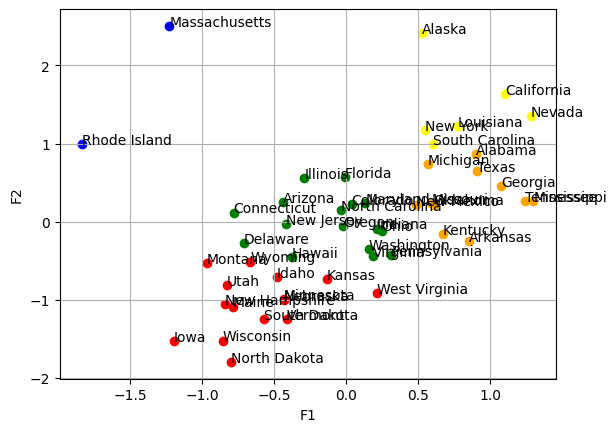

'\n聚类结果如下，可以看到，涉及强奸罪，盗窃罪最多的内华达州，阿拉斯加州，加利福尼亚州被聚成了一类。\n'

In [40]:
# 计算主成分得分（主成分值）
F1 = np.array([]); F2 = np.array([]); F3 = np.array([])
length = data.shape[0]
data = scale(data)
for i in range(length):
    F1 = np.append(F1, np.dot(Vec[0], data[i]))
    F2 = np.append(F2, np.dot(Vec[1], data[i]))
    F3 = np.append(F3, np.dot(Vec[2], data[i]))

# 由主成分得分排序
# 第一主成分排序
Order1 = Order = np.argsort(F1)[::-1]
print(df["state"][Order1[0]], df["state"][Order1[1]], df["state"][Order1[2]])
"""
排序结果为：Nevada  Alaska  California，即涉及强奸罪，盗窃罪最多的前三个州为内华达州，阿拉斯加州，加利福尼亚州
"""
# 第二主成分排序
Order2 = Order = np.argsort(F2)[::-1]
print(df["state"][Order2[0]], df["state"][Order2[1]], df["state"][Order2[2]])
"""
排序结果为：Alaska Nevada Massachusetts，即涉及汽车犯罪，杀人罪最多的前三个州为阿拉斯加州，内华达州，马萨诸塞州
"""
# 第三主成分排序
Order3 = Order = np.argsort(F3)[::-1]
print(df["state"][Order3[0]], df["state"][Order3[1]], df["state"][Order3[2]])
"""
排序结果为：New York Mississippi Alabama，即涉及夜盗罪，盗窃罪，抢劫罪最多的前三个州为纽约州，密西西比州，阿拉巴马州
"""

# 主成分聚类及可视化（以第一，第二主成分为例，聚成五类）
df1 = pd.DataFrame({"F1":F1, "F2":F2})
km = KMeans(n_clusters=5).fit(df1) 
label = km.labels_
fig=plt.figure()
for i in range(length):
    if label[i] == 0:
        plt.scatter(F1[i], F2[i], color="red")
    elif label[i] == 1:
        plt.scatter(F1[i], F2[i], color="orange")
    elif label[i] == 2:
        plt.scatter(F1[i], F2[i], color="yellow")   
    elif label[i] == 3:
        plt.scatter(F1[i], F2[i], color="blue")
    else:
        plt.scatter(F1[i], F2[i], color="green")
    plt.text(F1[i], F2[i],df["state"][i])

plt.xlabel("F1")
plt.ylabel("F2")
plt.grid()
plt.show()
"""
聚类结果如下，可以看到，涉及强奸罪，盗窃罪最多的内华达州，阿拉斯加州，加利福尼亚州被聚成了一类。
"""